In [14]:
import pandas as pd 
import matplotlib.pyplot as plt
from prophet import Prophet
from pylab import rcParams
rcParams['figure.figsize']=10,4

In [4]:
df = pd.read_csv('air_passengers.csv')

In [7]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [8]:
data = df['#Passengers']

<Axes: >

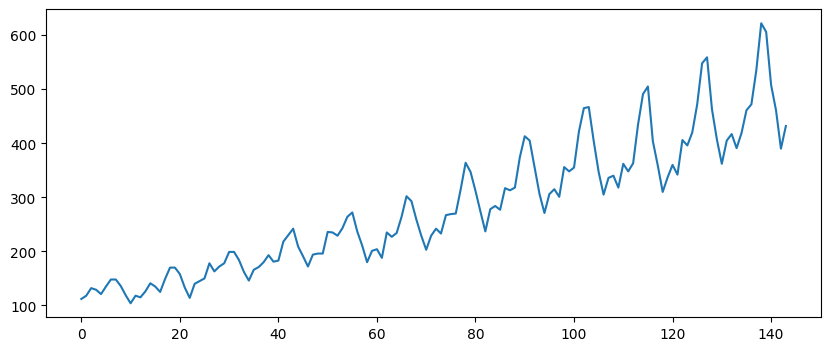

In [9]:
data.plot()

In [10]:
df.tail()

,Month,#Passengers
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


# prophet needs the date/month as 'ds' and the target/#Passengers as 'y'

In [11]:
df.columns = ['ds','y']
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [12]:
df.ds = pd.to_datetime(df.ds)

In [13]:
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [15]:
dir(Prophet)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'calculate_initial_params',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logist

## for Prophet model we need the 'ds' to be a datetime columns and not a datetime index like other ts models.

In [16]:
model = Prophet()

In [18]:
model.fit(df)

00:43:06 - cmdstanpy - INFO - Chain [1] start processing
00:43:07 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
#to check the fit of the model.
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [22]:
df.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [21]:
##create future dates.

In [19]:
future_dates = model.make_future_dataframe(periods=365)

In [23]:
pred = model.predict(future_dates)

In [24]:
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.662351,56.613442,113.090875,106.662351,106.662351,-21.848235,-21.848235,-21.848235,-21.848235,-21.848235,-21.848235,0.0,0.0,0.0,84.814116
1,1949-02-01,108.835378,48.992303,108.963389,108.835378,108.835378,-30.607610,-30.607610,-30.607610,-30.607610,-30.607610,-30.607610,0.0,0.0,0.0,78.227768
2,1949-03-01,110.798112,80.134521,141.038528,110.798112,110.798112,-0.455867,-0.455867,-0.455867,-0.455867,-0.455867,-0.455867,0.0,0.0,0.0,110.342245
3,1949-04-01,112.971139,81.640430,136.514175,112.971139,112.971139,-5.160420,-5.160420,-5.160420,-5.160420,-5.160420,-5.160420,0.0,0.0,0.0,107.810719
4,1949-05-01,115.074068,82.204095,139.234017,115.074068,115.074068,-3.807959,-3.807959,-3.807959,-3.807959,-3.807959,-3.807959,0.0,0.0,0.0,111.266109


In [25]:
pred_val = pred[['ds','yhat']]

In [27]:
pred_val.tail(370)

,ds,yhat
139,1960-08-01,540.527233
140,1960-09-01,491.536219
141,1960-10-01,456.703810
142,1960-11-01,421.955373
143,1960-12-01,451.174708
...,...,...
504,1961-11-27,498.608553
505,1961-11-28,497.074805
506,1961-11-29,494.898328
507,1961-11-30,492.123220


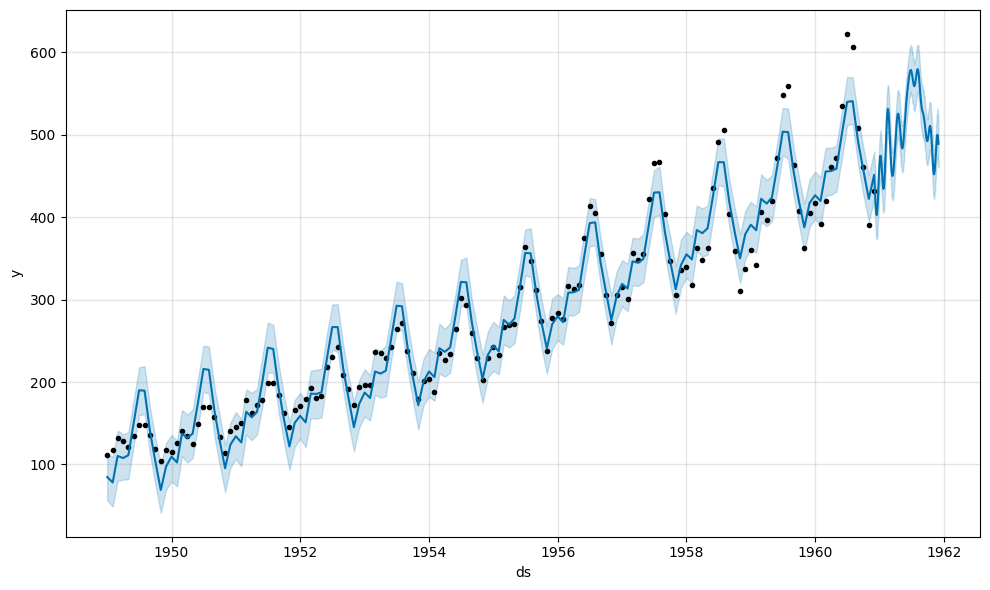

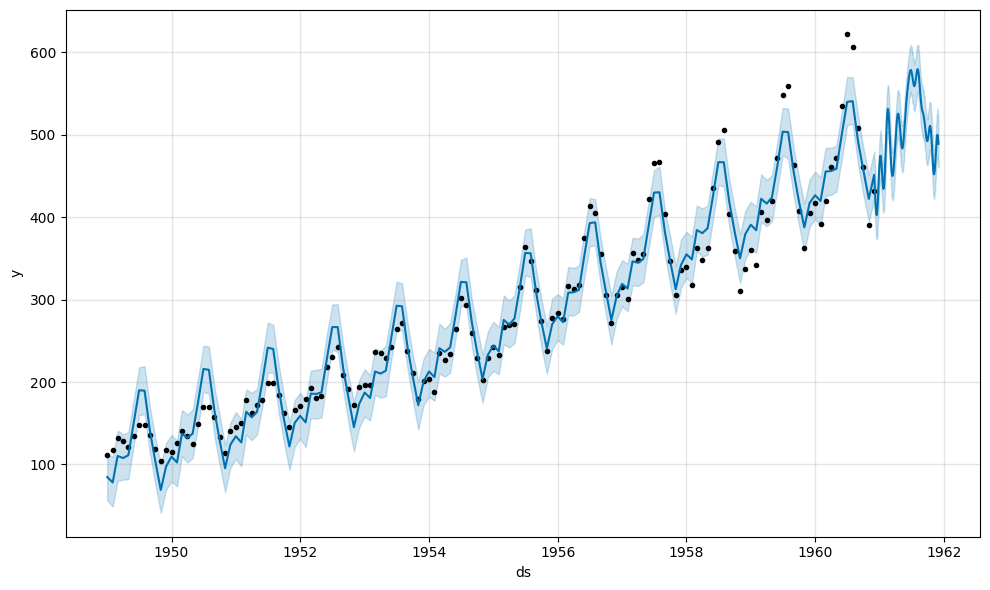

In [29]:
model.plot(pred)

## In the above plot the dots refer to the actual values and the trend line refer to the predicted 'y^'(yhat).

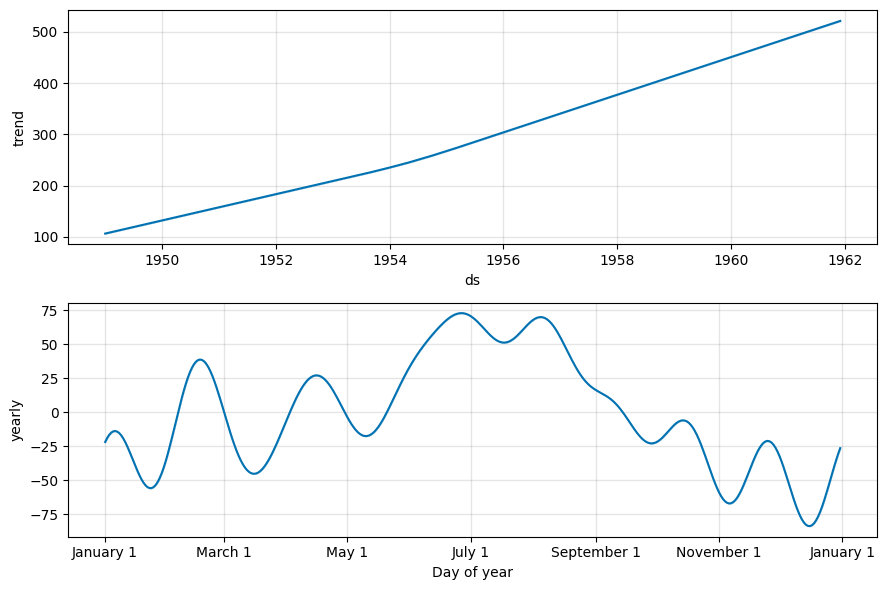

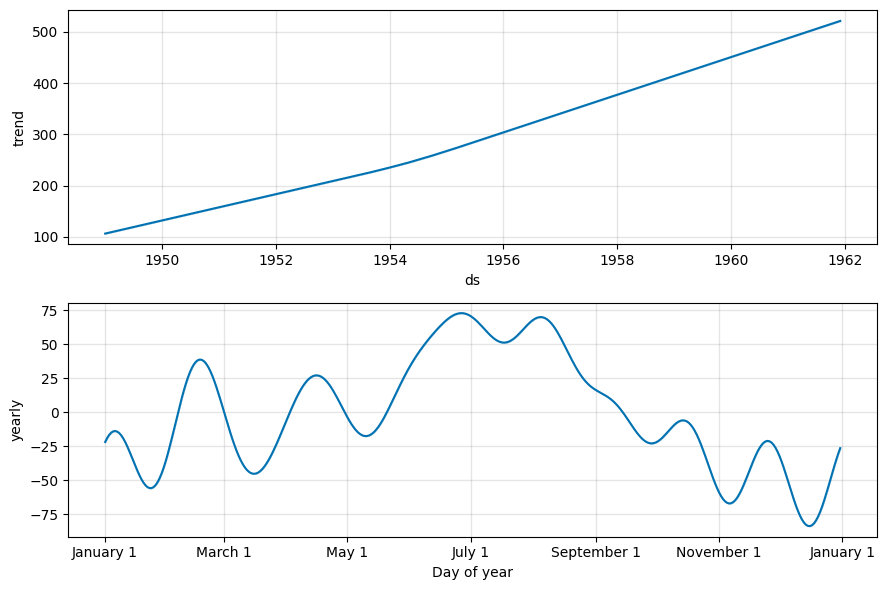

In [32]:
## visualize each components[trend, seasonality]
model.plot_components(pred)

In [36]:
## cross validation
from prophet.diagnostics import cross_validation

In [39]:
cv_df = cross_validation(model,horizon = '365 days')

  0%|          | 0/16 [00:00<?, ?it/s]

02:40:15 - cmdstanpy - INFO - Chain [1] start processing
02:40:15 - cmdstanpy - INFO - Chain [1] done processing
02:40:16 - cmdstanpy - INFO - Chain [1] start processing
02:40:16 - cmdstanpy - INFO - Chain [1] done processing
02:40:16 - cmdstanpy - INFO - Chain [1] start processing
02:40:17 - cmdstanpy - INFO - Chain [1] done processing
02:40:17 - cmdstanpy - INFO - Chain [1] start processing
02:40:17 - cmdstanpy - INFO - Chain [1] done processing
02:40:18 - cmdstanpy - INFO - Chain [1] start processing
02:40:18 - cmdstanpy - INFO - Chain [1] done processing
02:40:18 - cmdstanpy - INFO - Chain [1] start processing
02:40:19 - cmdstanpy - INFO - Chain [1] done processing
02:40:19 - cmdstanpy - INFO - Chain [1] start processing
02:40:19 - cmdstanpy - INFO - Chain [1] done processing
02:40:19 - cmdstanpy - INFO - Chain [1] start processing
02:40:20 - cmdstanpy - INFO - Chain [1] done processing
02:40:20 - cmdstanpy - INFO - Chain [1] start processing
02:40:21 - cmdstanpy - INFO - Chain [1]

In [34]:
## performance metrics
from prophet.diagnostics import performance_metrics

In [40]:
df_p = performance_metrics(cv_df)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,58 days 12:00:00,1212.232148,34.817124,28.483820,0.080672,0.091531,0.083375,0.157895
1,59 days 12:00:00,1614.549144,40.181453,33.427037,0.085576,0.093923,0.088588,0.157895
2,60 days 00:00:00,1234.153766,35.130525,28.451728,0.086193,0.092404,0.086414,0.236842
3,61 days 00:00:00,1547.095817,39.333139,34.478718,0.101915,0.100801,0.100935,0.144737
4,88 days 00:00:00,1480.514609,38.477456,32.526273,0.098442,0.100801,0.097683,0.157895


In [42]:
from prophet.plot import plot_cross_validation_metric

C:\Users\alokk\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
C:\Users\alokk\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:548: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


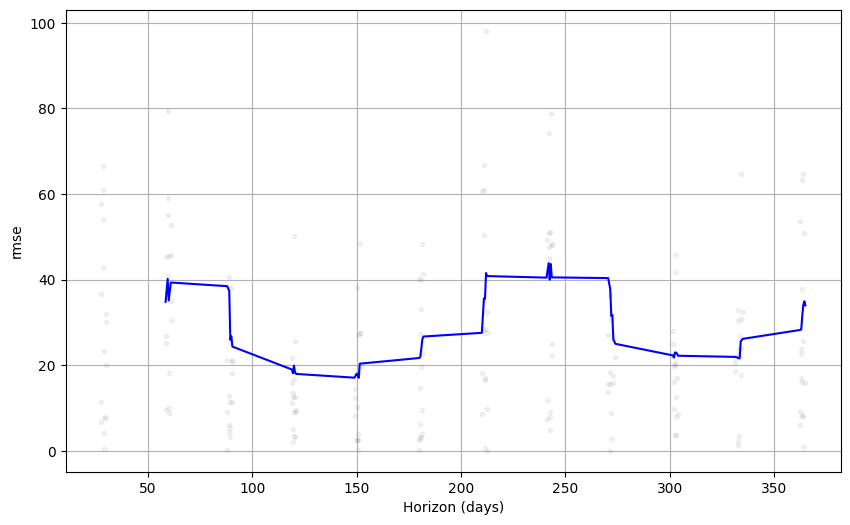

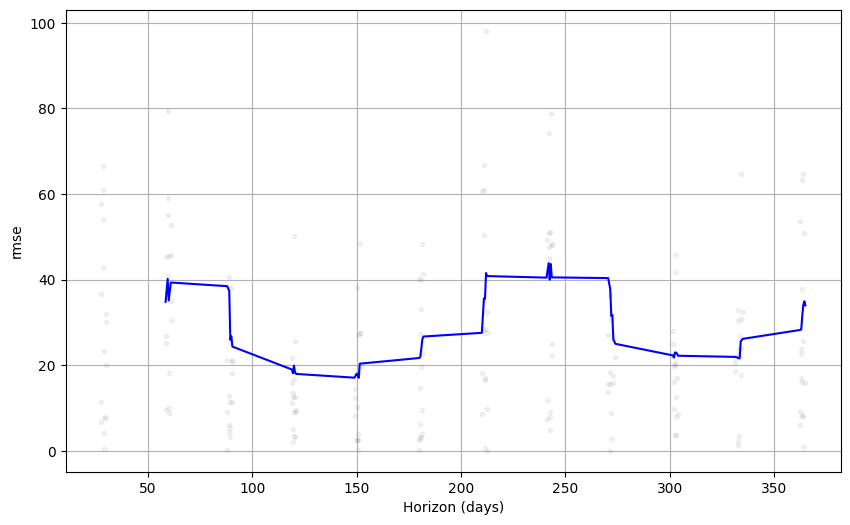

In [43]:
plot_cross_validation_metric(cv_df, metric = 'rmse')